**INITIALIZATION:**

In [1]:
#@ IMPORTING LIBRARIES AND DEPENDENCIES:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

**IMPORTING DATASET:**

In [2]:
#@ IMPORTING DATASET:
PATH = "./housing.csv"
select_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", 
               "median_income", "median_house_value"]
data = pd.read_csv(PATH, usecols=select_cols)

In [3]:
#@ INSPECTING DATAFRAME:
print(data.shape)

(20640, 9)


In [4]:
#@ INSPECTING DATAFRAME:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


**EXPLORATORY DATA ANALYSIS:**

In [5]:
#@ DATAFRAME INFORMATION:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


- Answer for Questions 1: "total_bedrooms" = 207

**NULL VALUES CHECKER:**

In [6]:
#@ INSPECTING NULL VALUES:
incomplete = data.isna().mean()*100
print(incomplete[incomplete > 0])

total_bedrooms    1.002907
dtype: float64


In [7]:
#@ INSPECTING NULL VALUES:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

**DUPLICATES:**

In [8]:
#@ INSPECTING DUPLICATES:
data.duplicated().value_counts()

False    20640
dtype: int64

**DESCRIPTIVE ANALYSIS:**

In [9]:
#@ INITIALIZING DESCRIPTIVE ANALYSIS:
data.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-124.3500,-122.2900,-121.8000,-118.4900,-118.01000,-117.25000,-117.080000,-116.29000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,32.5400,33.6300,33.9300,34.2600,37.71000,38.48000,38.960000,40.62610,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,1.0000,13.0000,18.0000,29.0000,37.00000,46.00000,52.000000,52.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,2.0000,941.0000,1447.7500,2127.0000,3148.00000,4651.50000,6213.200000,11212.11000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,1.0000,198.0000,296.0000,435.0000,647.00000,965.00000,1275.400000,2221.36000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,3.0000,510.0000,787.0000,1166.0000,1725.00000,2566.00000,3288.000000,5805.83000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,1.0000,184.0000,280.0000,409.0000,605.00000,890.00000,1162.000000,1982.66000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,0.4999,1.9038,2.5634,3.5348,4.74325,6.15921,7.300305,10.59654,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,14999.0000,82300.0000,119600.0000,179700.0000,264725.00000,376600.00000,489810.000000,500001.00000,500001.0000


In [10]:
#@ INSPECTING MEDIAN:
np.median(data['population'])

1166.0

- Answer for Question 2: "population" = 1166.0

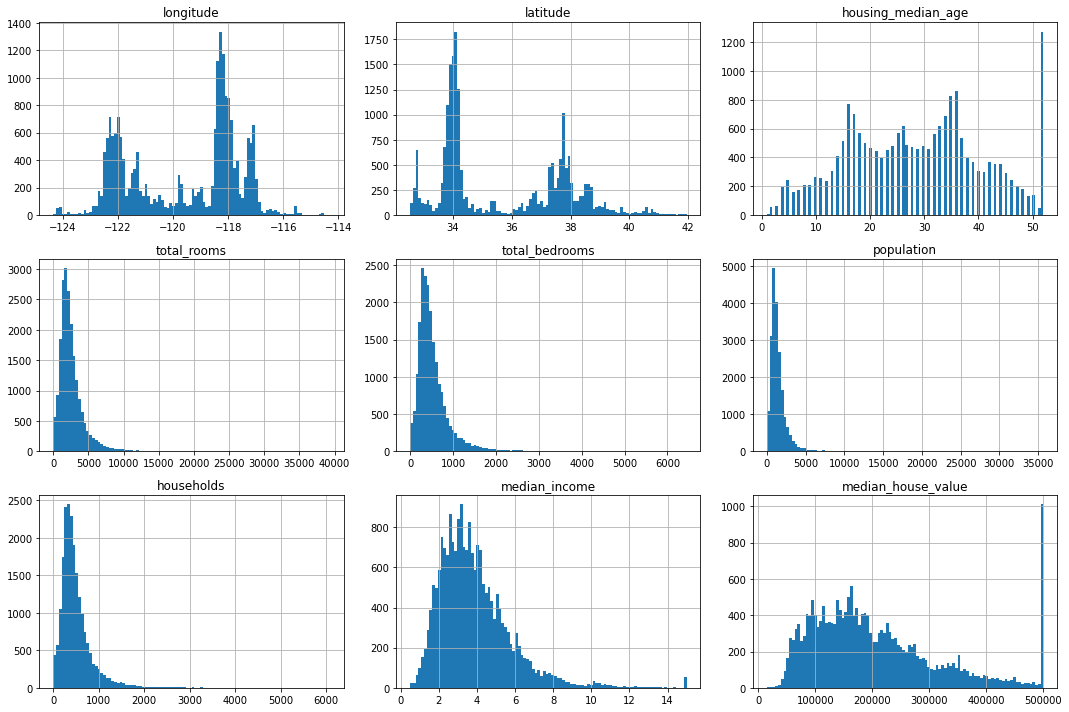

In [11]:
#@ INSPECTING HISTOGRAM:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
data.hist(bins=100, ax=ax, layout=(3, 3), column=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
                                                  "population", "households", "median_income", "median_house_value"])
plt.tight_layout()
plt.show()

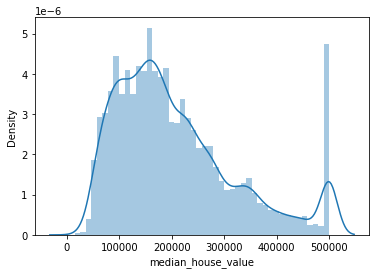

In [12]:
#@ INSPECTING HOUSE VALUES:
sns.distplot(data.median_house_value)

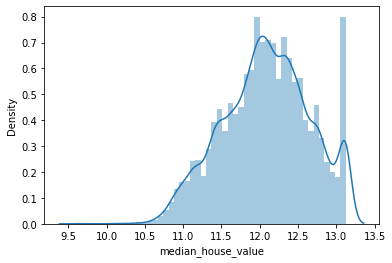

In [13]:
#@ INSPECTING HOUSE VALUES:
sns.distplot(np.log1p(data.median_house_value))

**SIMPLE LINEAR REGRESSION:**

In [14]:
#@ FUNCTION FOR LINEAR REGRESSION:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

**DATASET PREPARATION:**

In [15]:
#@ SPLITTING THE DATASET:
n = len(data)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

#@ SHUFFLING DATASET:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_shuffled = data.iloc[idx]

In [16]:
#@ PREPARING THE DATASET:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
#@ PREPARING THE LABELS:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [18]:
#@ DELETING DATASET:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [19]:
#@ PREPARING THE DATASET:
check=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
       "population", "households", "median_income"]

#@ DEFINING FUNCTION:
def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [20]:
#@ FUNCTION FOR RMSE VALUES:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [21]:
#@ FILLING MISSING VALUES:
mean = df_train.total_bedrooms.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

In [22]:
#@ FILLING MISSING VALUES:
X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [23]:
#@ GETTING RMSE SCORE:
np.round(rmse(y_val, y_mean_pred_val),2)

0.33

In [24]:
#@ PREPARIN DATASET:
X_null_train = prepare_X(df_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

In [25]:
#@ PREPARING DATASET:
X_null_val = prepare_X(df_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

In [26]:
#@ GETTING RMSE SCORE:
np.round(rmse(y_val, y_null_pred_val),2)

0.33

- Answer for Question 3: Both are equally good. 

**REGULARIZATION:**

In [27]:
#@ FUNCTION FOR TRAINING LINEAR REGRESSION:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [28]:
#@ INSPECTING THE RESULTS:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, rmse_val)

0 -11.686975242036546 0.33
1e-06 -11.686959175728921 0.33
0.0001 -11.685368865034667 0.33
0.001 -11.670931317799797 0.33
0.01 -11.528493585632091 0.33
0.1 -10.274500282195673 0.33
1 -4.920480897742212 0.33
5 -1.482095745621172 0.34
10 -0.7899311831779245 0.34


- Answer for Question 4 is 0.

**SEED CHECKING:**

In [29]:
#@ CHECKING THE RMSE SCORES:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = data.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 -11.900382138125133 0.34
1 -11.732757372921618 0.34
2 -11.806729361193014 0.33
3 -11.587900347753235 0.34
4 -11.38947058831824 0.34
5 -11.447114275587968 0.34
6 -11.370516351548385 0.35
7 -12.47344891889502 0.34
8 -11.800287429792748 0.35
9 -11.459046830736924 0.34


In [30]:
#@ INSPECTING THE RMSE LIST:
rmse_list

[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]

In [31]:
#@ INSPECTING THE RMSE:
np.round(np.std(rmse_list),3)

0.005

- Answer for Question 5 is 0.005.

**SEED AND REGULARIZATION:**

In [32]:
#@ INITIALIZING SEED AND REGULARIZATION:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_train_val['median_house_value']
del df_test['median_house_value']

In [33]:
#@ INSPECTING RMSE:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.35

- Answer for Question 6 is 0.35.